In [1]:
#load the data
import pandas as pd
base = pd.read_csv('vendas.csv')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produto         200 non-null    object 
 1   Categoria       200 non-null    object 
 2   Quantidade      200 non-null    int64  
 3   Preço Unitário  200 non-null    float64
 4   Data de Venda   200 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


In [2]:
#exploring the data
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produto         200 non-null    object 
 1   Categoria       200 non-null    object 
 2   Quantidade      200 non-null    int64  
 3   Preço Unitário  200 non-null    float64
 4   Data de Venda   200 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


In [3]:
#exploring the data
base.dtypes

,0
Produto,object
Categoria,object
Quantidade,int64
Preço Unitário,float64
Data de Venda,object


In [5]:
#creating new column 'Valor Total'
base['Valor Total'] = base[['Quantidade','Preço Unitário']].prod(axis=1)
display(base)

,Produto,Categoria,Quantidade,Preço Unitário,Data de Venda,Valor Total
0,Torradeira,Eletroportáteis,45,155.52,2023-02-13,6998.40
1,Liquidificador,Cozinha,7,201.13,2023-05-08,1407.91
2,Liquidificador,Eletroportáteis,25,451.86,2023-03-02,11296.50
3,Torradeira,Eletroportáteis,3,86.26,2023-10-13,258.78
4,Forno Elétrico,Pequenos Eletros,31,117.87,2023-08-02,3653.97
...,...,...,...,...,...,...
195,Liquidificador,Eletrodomésticos,18,309.66,2023-03-11,5573.88
196,Liquidificador,Pequenos Eletros,29,358.90,2023-02-05,10408.10
197,Forno Elétrico,Cozinha,5,118.28,2023-05-22,591.40
198,Forno Elétrico,Eletrodomésticos,46,415.01,2023-08-01,19090.46


In [42]:
#grouping equal products together by 'Quantidade'
qtds_agrupadas = base.groupby('Produto')['Quantidade'].sum()
qtds_agrupadas = pd.DataFrame(qtds_agrupadas)
display(qtds_agrupadas)

,Quantidade
Produto,
Batedeira,877
Cafeteira,740
Espremedor de Suco,951
Forno Elétrico,857
Liquidificador,1045
Torradeira,1008


In [24]:
#searching for the best selling product in quantity
qtds_agrupadas.loc[qtds_agrupadas.Quantidade==qtds_agrupadas.Quantidade.max()]

,Quantidade
Produto,
Liquidificador,1045


In [41]:
#grouping equal products together by 'Valor Total'
valores_agrupados = base.groupby('Produto')['Valor Total'].sum()
valores_agrupados = pd.DataFrame(valores_agrupados)
display(valores_agrupados)

,Valor Total
Produto,
Batedeira,237292.42
Cafeteira,207707.00
Espremedor de Suco,245398.75
Forno Elétrico,245649.11
Liquidificador,284576.63
Torradeira,302300.40


In [26]:
#searching for the best selling product in total value
valores_agrupados.loc[valores_agrupados['Valor Total']==valores_agrupados['Valor Total'].max()]

,Valor Total
Produto,
Torradeira,302300.4


In [28]:
#statistical summary of numerical columns
base['Quantidade'].describe()

,Quantidade
count,200.000000
mean,27.390000
std,14.053305
min,1.000000
25%,16.000000
50%,28.000000
75%,40.000000
max,50.000000


In [29]:
#statistical summary of numerical columns
base['Preço Unitário'].describe()

,Preço Unitário
count,200.000000
mean,277.955650
std,124.989603
min,55.520000
25%,177.425000
50%,266.980000
75%,384.990000
max,498.480000


In [31]:
#statistical summary of numerical columns
base['Valor Total'].describe()

,Valor Total
count,200.000000
mean,7614.621550
std,5380.213344
min,159.490000
25%,3153.300000
50%,6916.800000
75%,11021.020000
max,24223.500000


In [33]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Batedeira'),
  Text(1, 0, 'Cafeteira'),
  Text(2, 0, 'Espremedor de Suco'),
  Text(3, 0, 'Forno Elétrico'),
  Text(4, 0, 'Liquidificador'),
  Text(5, 0, 'Torradeira')])

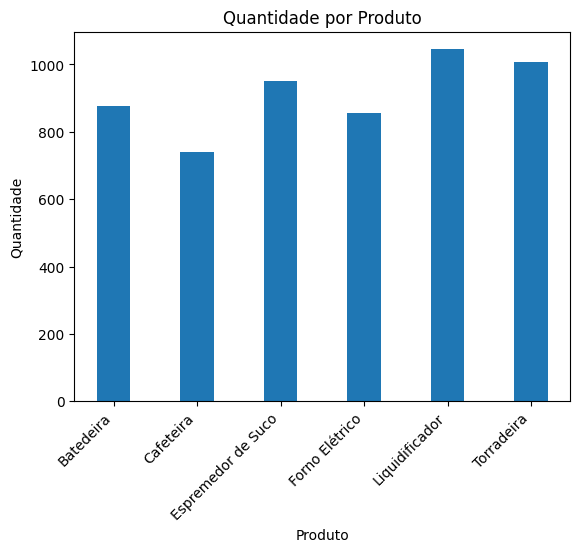

In [55]:
#creating graphics
plt.bar(qtds_agrupadas.index,qtds_agrupadas.Quantidade,width=0.4)
plt.title('Quantidade por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha="right")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Batedeira'),
  Text(1, 0, 'Cafeteira'),
  Text(2, 0, 'Espremedor de Suco'),
  Text(3, 0, 'Forno Elétrico'),
  Text(4, 0, 'Liquidificador'),
  Text(5, 0, 'Torradeira')])

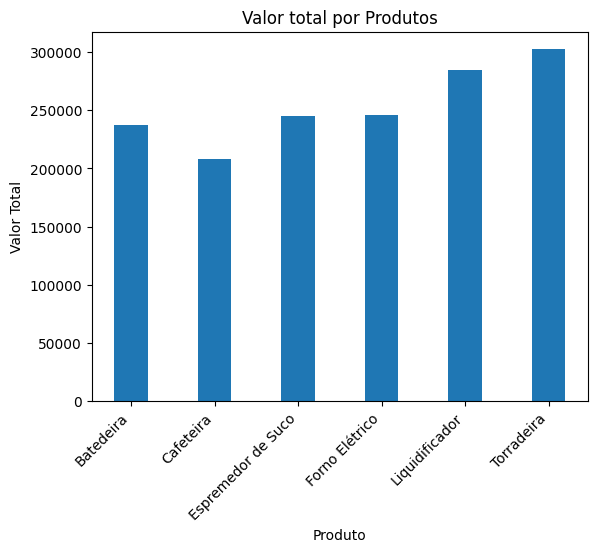

In [56]:
#creating graphics
plt.bar(valores_agrupados.index,valores_agrupados['Valor Total'],width=0.4)
plt.title('Valor total por Produtos')
plt.xlabel('Produto')
plt.ylabel('Valor Total')
plt.xticks(rotation=45, ha="right")

A observação dos gráficos permite apontar que todos os produtos tem contribuições relevantes para o lucro da empresa, não havendo a presença de algum que vende drasticamente menos ou mais que os outros (outlier).